In [21]:
#Used for math opperations
import numpy as np

#Used for plotting data
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
%matplotlib inline

#Used to read outside files
import pandas as pd

### Get the Names of CSV files

In [2]:
System = input("Input Operating System; W for Windows, M for Mac or Linux: ")

Input Operating System; W for Windows, M for Mac or Linux: w


##### The discrete Torus is defined by an n by n grid. Your n value should be the length of one edge

In [128]:
# A list of both n and s values
# Must be input as strings and include all sig-figs
# Maximum of nine s values

N = ['10','23','48','50','65','85','100']
S = ['0.0','0.25', '0.525','0.5','0.55','0.75','1.0']

In [129]:
if System == 'W' or 'w':
    Address = r'..\\..\\Data\\Heat Map\\Torus\\'
if System == 'M' or 'm':
    Address = r'..//..//Data//Heat Map//Torus//'

In [130]:
# These Functions construct the addresses of all the files in the folder

def filenumber(n):
    if System == 'W' or 'w':
        number = Address + '\\' + n
    if System == 'M' or 'm':
        number = Address + '//' + n
    return number

def filename(n ,s):
    name = Address + 't2_heat_map_s' + s + '_n_' + n +'_numTrials_1.csv'
    return name

In [131]:
# This creates a list of all data addresses the user specified
Files = []

for n in range(len(N)):
    for s in range(len(S)):
        Files.append(filename((N[n]),S[s]))

In [132]:
print(Files[0])

..//..//Data//Heat Map//Torus//t2_heat_map_s0.0_n_10_numTrials_1.csv


### Get CSV Data

In [133]:
# Takes a csv file and reads all the data
def getdata(file):
    colnames = ['i','j','data']
    File_Data = np.genfromtxt(file, delimiter=",")
    
    return list(File_Data.flatten())

In [134]:
# This code is a little messy. What it is doing is taking the trial data and creating lists of length n which represent
# each row of the n by n grid that is the torus. This allows sns.heatmap to work properly
Heat_Data = []




for x in range(len(Files)):
    Temp_Data = getdata(Files[x])

    Heat_Temp = []
    for p in range(int(np.sqrt(len(Temp_Data)))):
        Temp = []
        
        for q in range(int(np.sqrt(len(Temp_Data)))):
            Temp.append(Temp_Data[p*(int(np.sqrt(len(Temp_Data))))+q])
                        
        Heat_Temp.append(Temp)
    
    Heat_Data.append(Heat_Temp)

### Getting Ready to Graph

In [135]:
def graph2DTorus(n):
    index = N.index(str(n))
    
    fig = plt.figure(figsize =(20,20))
    fig.suptitle("DFGFs on Torus with N = {}".format(n), fontsize=20)
    
    for i in range(len(S)):
        ax = plt.subplot(3,3,i+1)
        ax = sns.heatmap(Heat_Data[(index*len(S))+i], cmap='coolwarm', cbar=False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        
        ax.set_title('s = {}'.format(S[i]), fontsize=10)
        plt.axis('off')
        
    return plt.show()

## Graphs

### 2D Graph

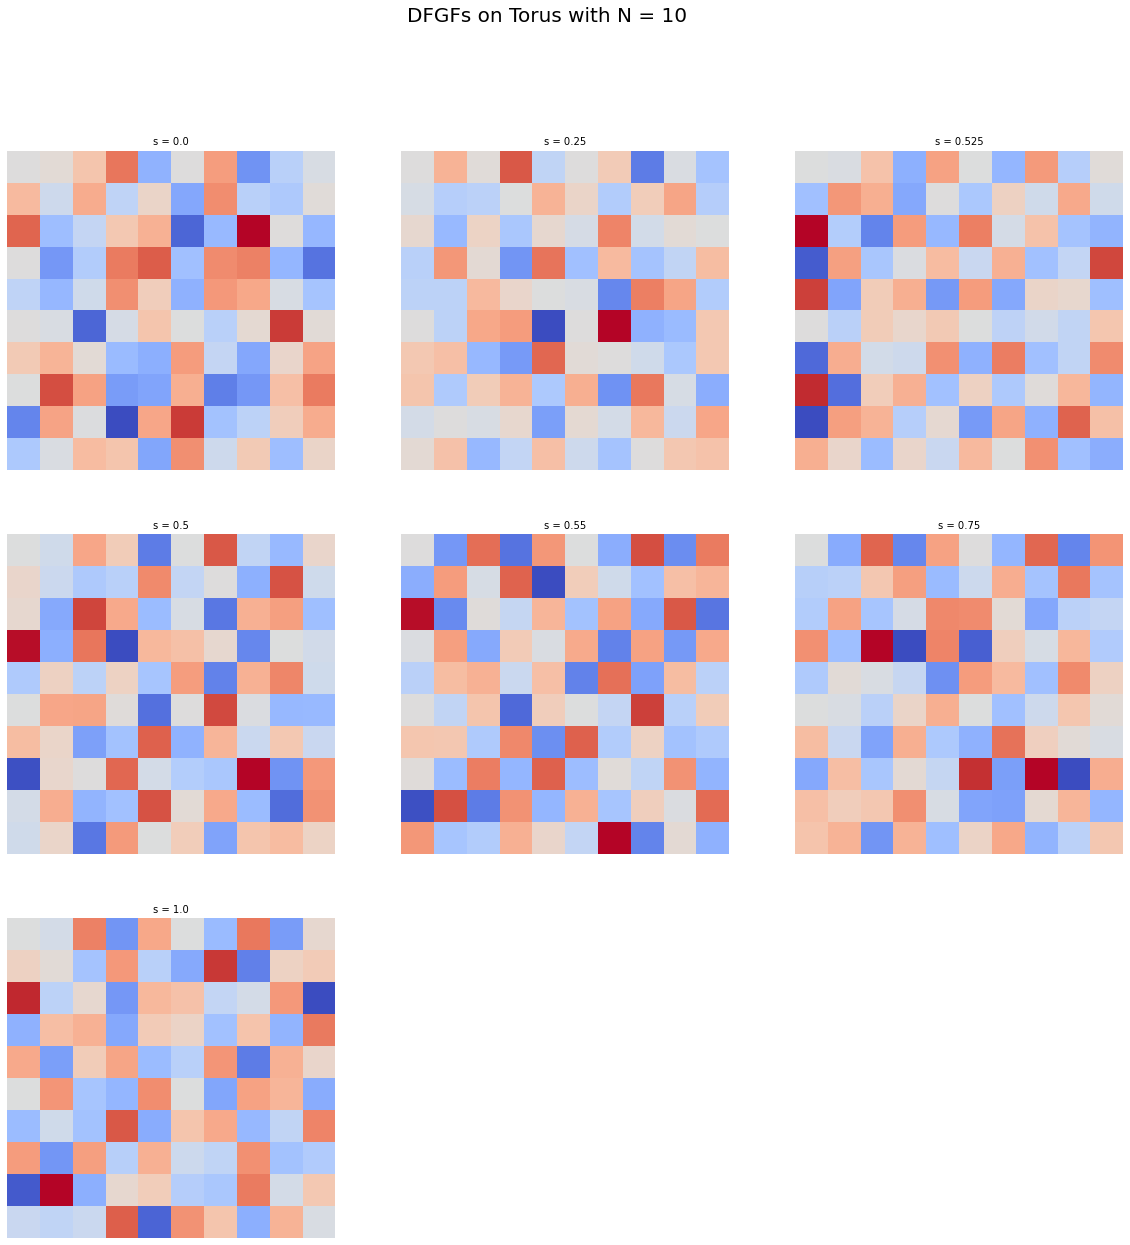

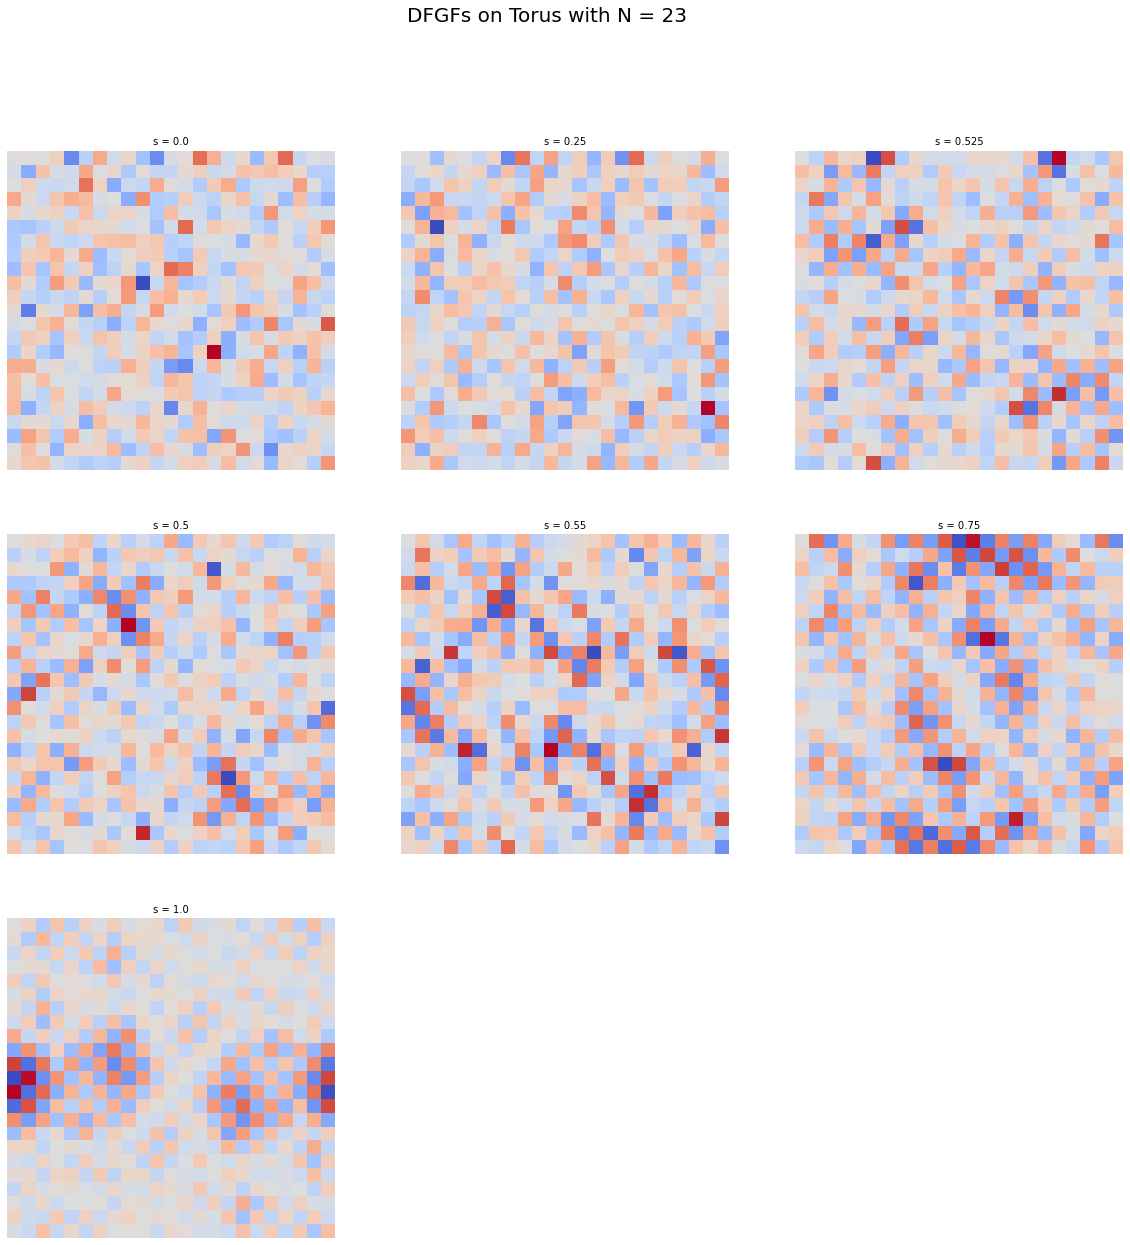

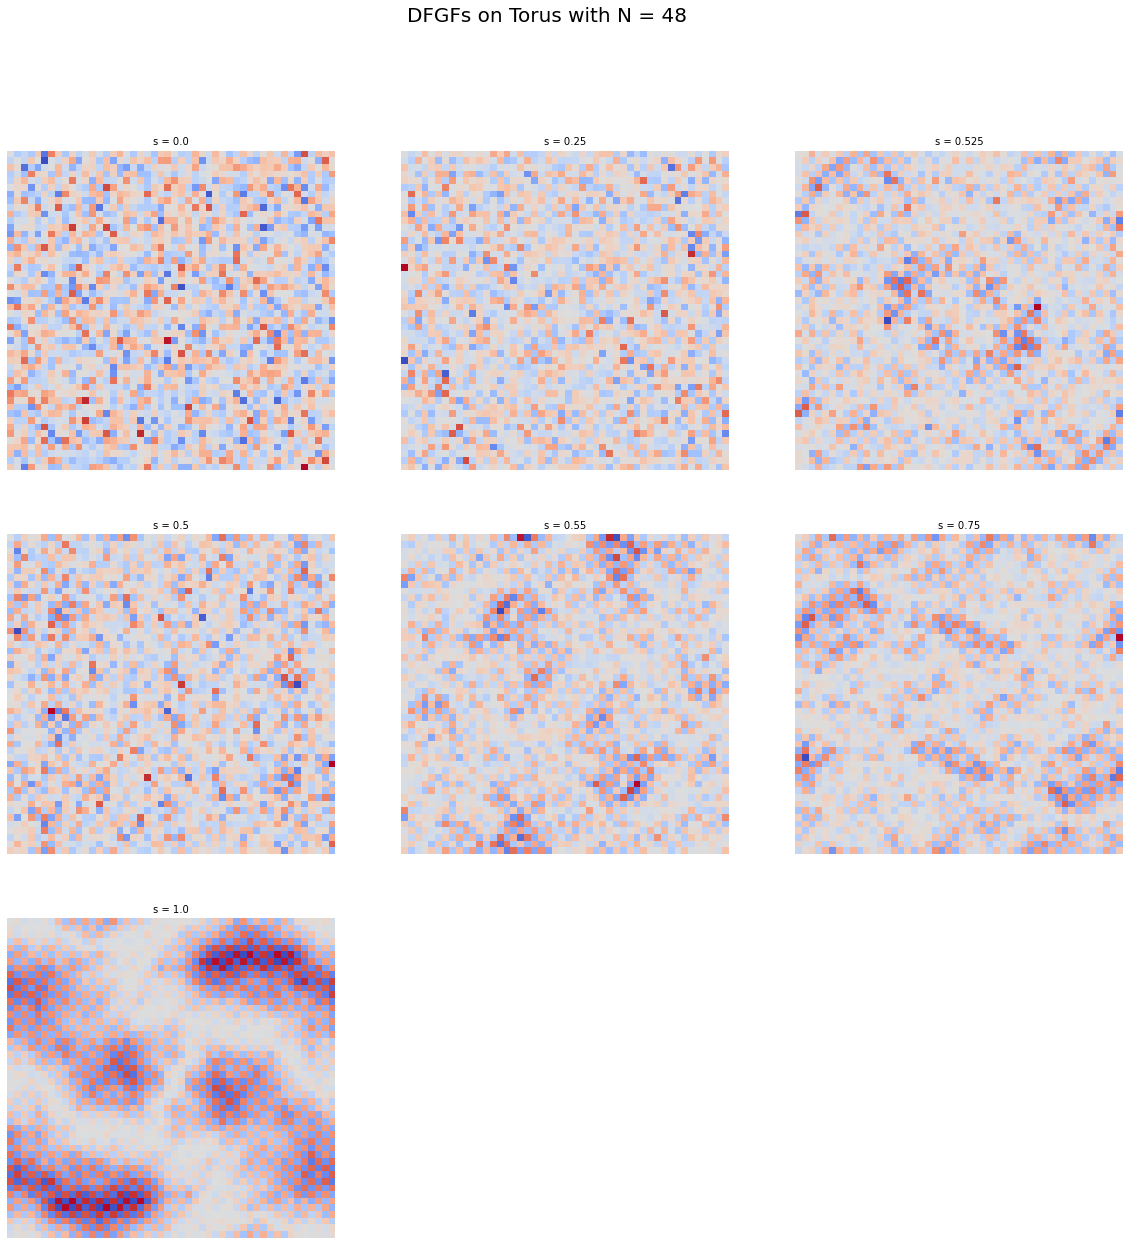

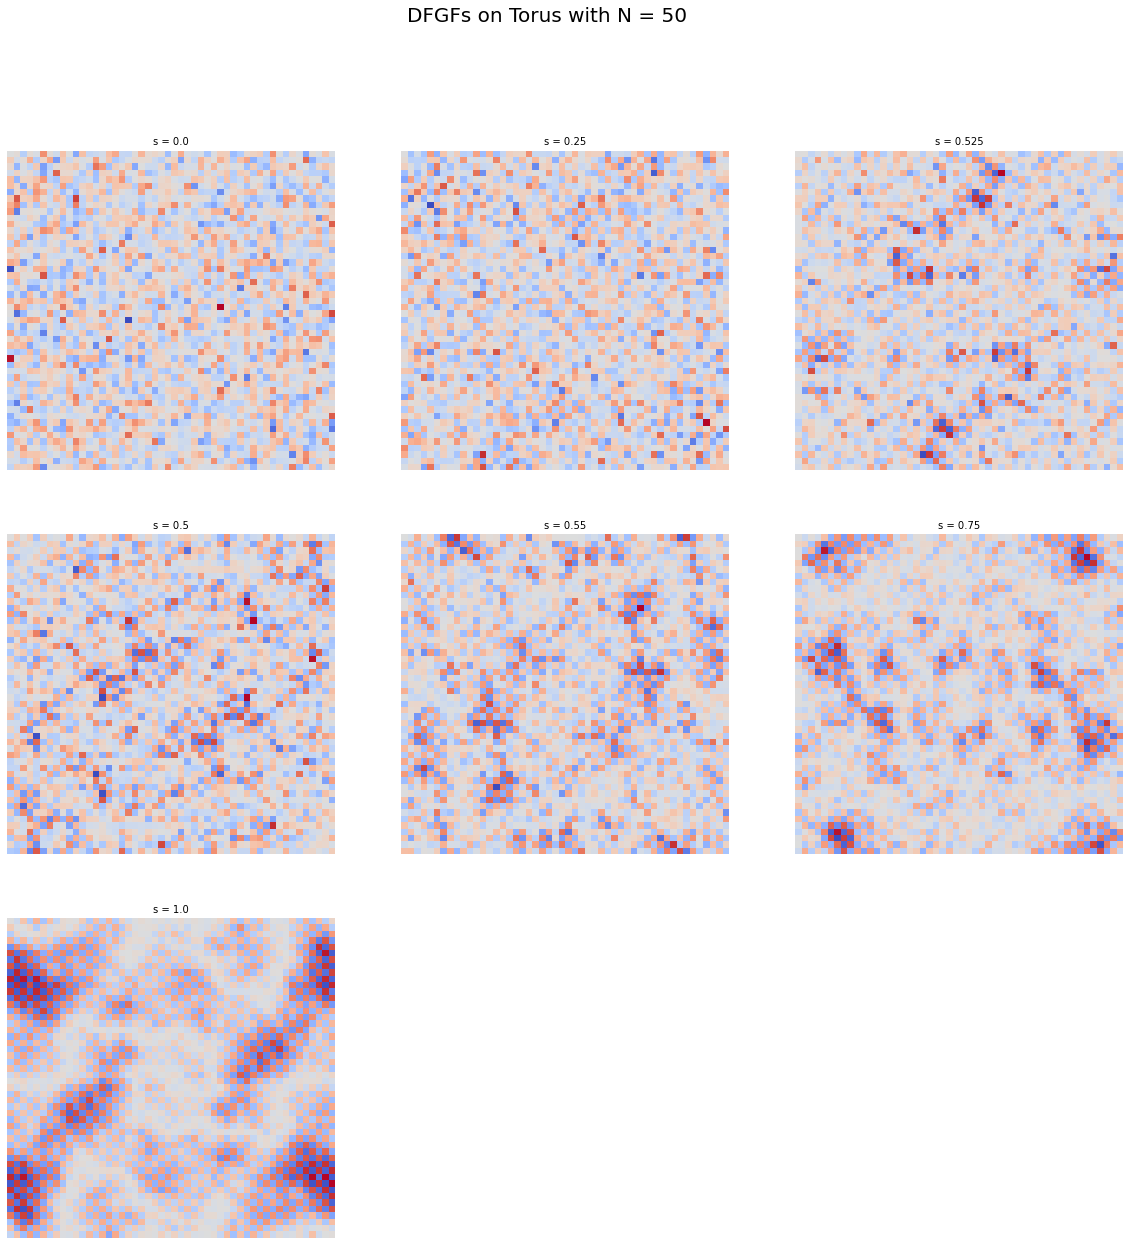

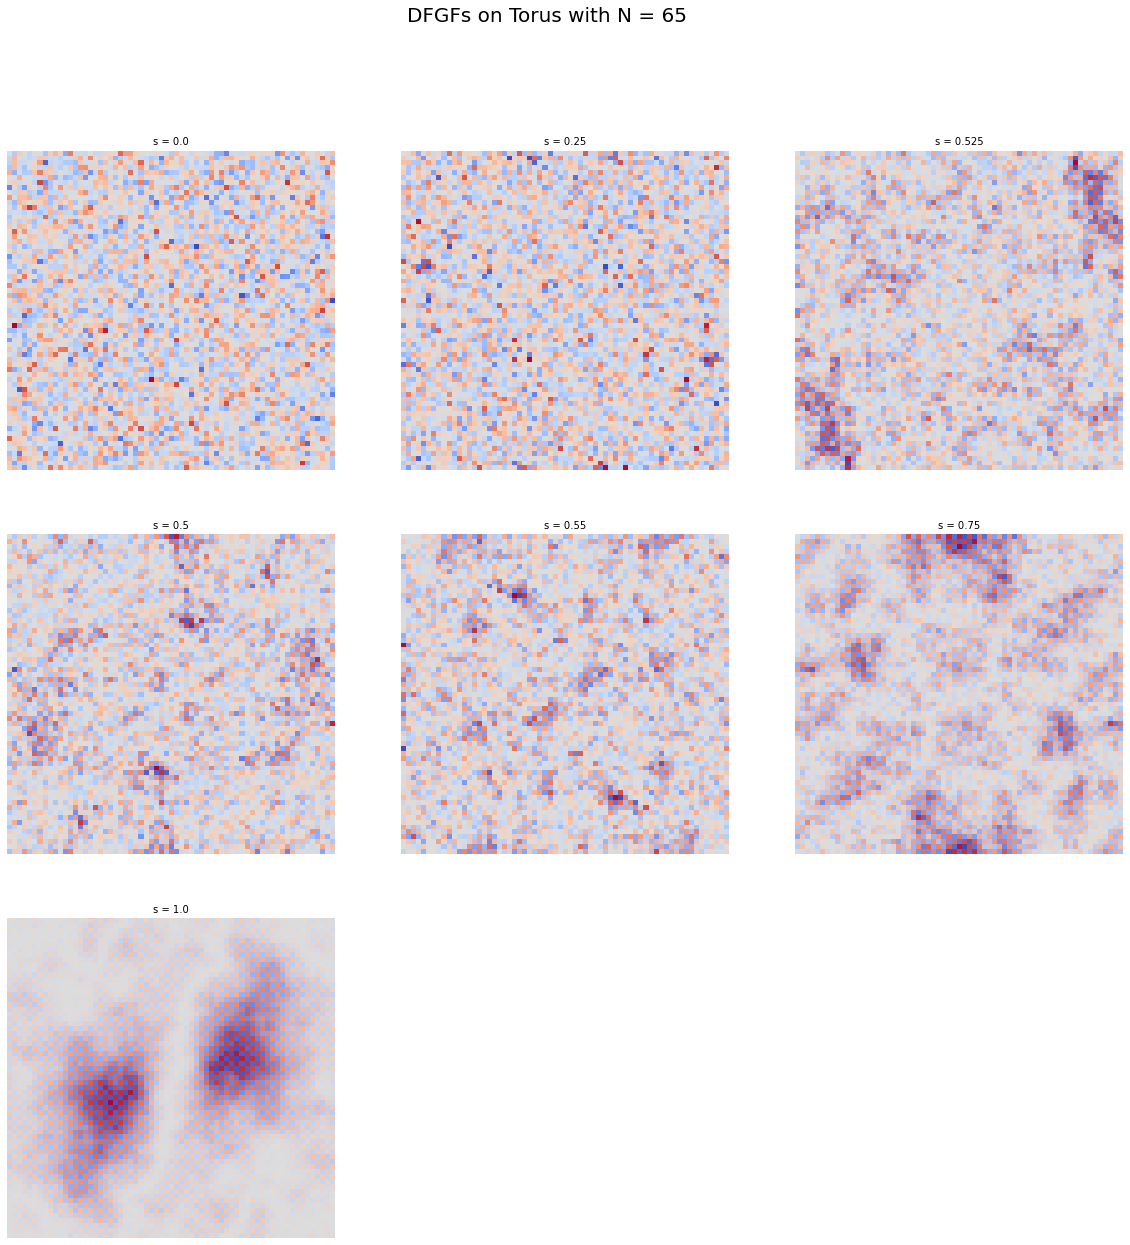

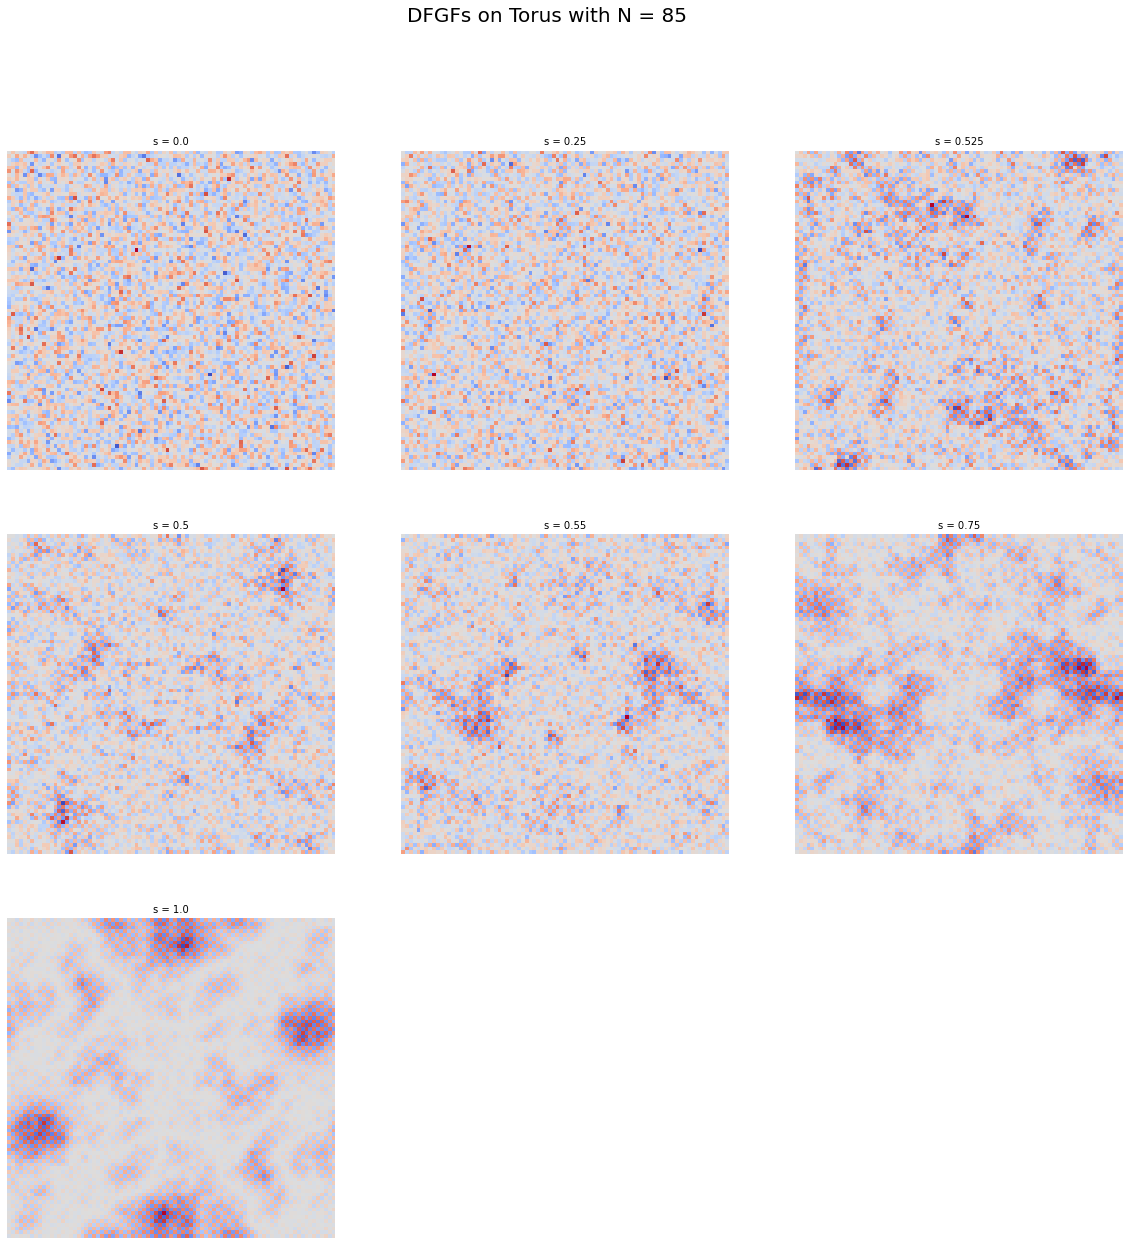

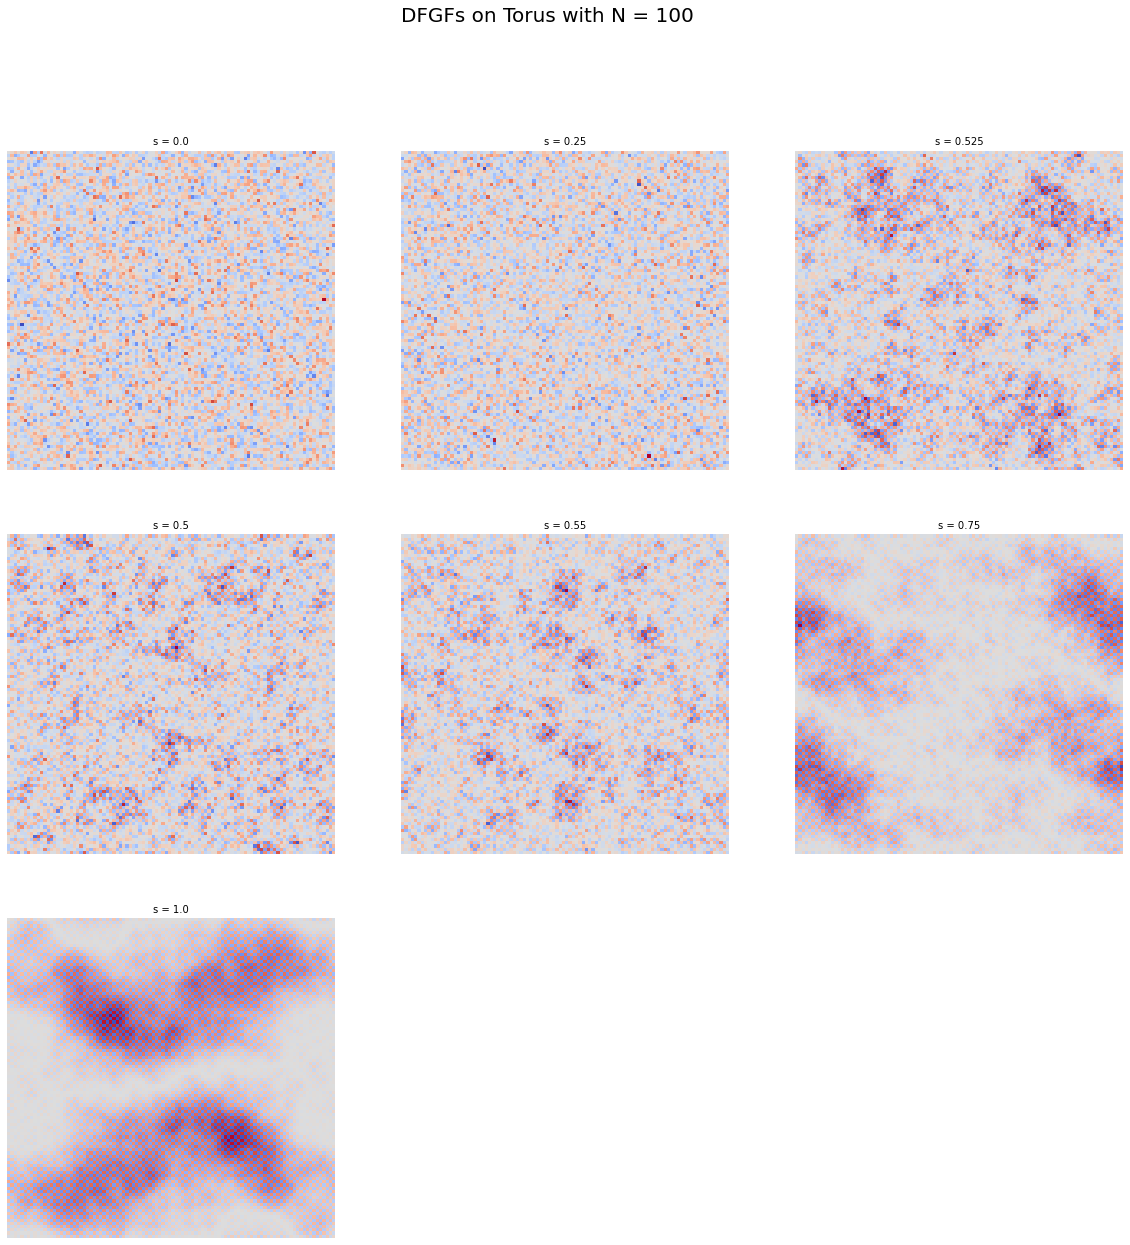

In [136]:
for n in range(len(N)):
    graph2DTorus(int(N[n]))